### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

The independent variable is the stimuli of this experiment, that is whether it is congruent or incongruent task. The dependent variable is the time taken to name the ink used for the task.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

$$H_o: \mu_{incongruent} = \mu_{congruent}$$
$$H_1: \mu_{incongruent} > \mu_{congruent}$$

where \mu_{incongruent} is the population mean of the response time under incongruent situation and \mu_{congruent} is the population mean of the response time under congruent situation. It is a one-tail test as we are only interested to test in one direction.

Moreover, since the number of sample is small, we did not know the population standard deviation, a t-test is a suitable test. Also, we decide to use the the paired t-test since the sample consists of one group of units that has been tested twice, on the other word, each individual are tested twice.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
# Perform the analysis here
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [2]:
df.mean()

Congruent      14.051125
Incongruent    22.015917
dtype: float64

In [3]:
df.median()

Congruent      14.3565
Incongruent    21.0175
dtype: float64

In [4]:
df.var()

Congruent      12.669029
Incongruent    23.011757
dtype: float64

In [5]:
df.shape[0]

24

It seems that on average, the time taken to name ink color in congruent situation is faster than incongruent. Since average might be affected by outlier, I try to look at the median data. The median data shows the same observation as the average. Also, the incongruent case seems to have bigger variance than the congruent case. One other thing to note is that there is only small number of sample data we have, that is 24. In this case, using z-test might not be appropriate. Instead, t-test could be a more suitable approach.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Text(0.5,1,'Minutes vs Count for Congruent and Incoungruent Data')

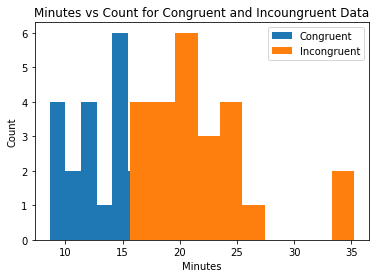

In [6]:
# Build the visualizations here
plt.hist(df['Congruent'], label='Congruent')
plt.hist(df['Incongruent'], label='Incongruent')
plt.legend(loc='upper right')
plt.xlabel('Minutes')
plt.ylabel('Count')
plt.title('Minutes vs Count for Congruent and Incoungruent Data')

Text(0.5,0,'Minutes difference')

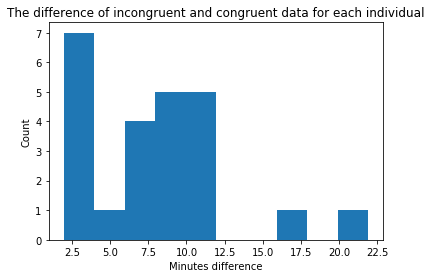

In [7]:
plt.hist(df['Incongruent'] - df['Congruent'])
plt.title("The difference of incongruent and congruent data for each individual")
plt.ylabel("Count")
plt.xlabel("Minutes difference")

Based on the first plot, it seems like for congruent data, most people spent around 15 minutes to finish the task. However, for the incongruent data, most people spend around 20 minutes to finish the task. From the first plot, we can also see that it seems like the incongruent task takes more time than the congruent task.

From the second plot, we can see that each individual in the dataset performs worse on the incongruent task than the congruent task.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In this case, due to the small amount of data, t-test is appropriate to use. Moreover, since the data on each row come from 1 individual, we can use paired t-test to analyse the data.

In [8]:
# Perform the statistical test here
import scipy.stats as stats
stats, p_value = stats.ttest_rel(df['Incongruent'], df['Congruent'])


In [9]:
# Since the above result are for two tail, divide the p_value by two for our evaluation
alpha = 0.05
if (p_value/2 < alpha):
    print("Reject null hypothesis, mean of {} is greater than mean of {}".format('Incongruent Data','Congruent Data'))
else:
    print("Accept null hypothesis")

Reject null hypothesis, mean of Incongruent Data is greater than mean of Congruent Data


In this case, with confidence interval of 95% which means Type 1 error probabiliy of 0.05, we reject the null hypothesis since the p-value is less than alpha. There is significant evidence that the mean of incongruent data is greater than congruent data.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

I think it is because human read on daily basis that it seems to be effortless. The incongruent task takes longer because in that case there is distrubance in the form of the color of the text which confuses the brain and increase the brain load, thus, causing longer duration to perceive the information. 

Other alternative task that might result in similar effect would be reading number with congruent and incongruent sizes. 